#  DATA SCIENCE WITH PYTHON : Movielens Case Study


**Background of Problem Statement :**

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

**Problem Objective :**

Using the Exploratory Data Analysis technique to find out features affecting the ratings of any particular movie and to build a model to predict the movie ratings.

In [1]:
# Import necessary header files

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns 

import warnings

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB


In [2]:
# To ignore warning
warnings.simplefilter('ignore')

# To display number of columns
pd.set_option('display.max_columns',30)


# 

# Analysis Task 1

   - Import the Three Datasets

In [3]:
# Load rating.dat file

ratings = pd.read_csv('ratings.dat',sep='::', header=None, names = ['UserID','MovieID','Rating','Timestamp'])
ratings.head()


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:

ratings.shape


(1000209, 4)

In [5]:

ratings.describe()


,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [6]:

ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


# 

In [7]:
# Load users.dat file

users = pd.read_csv('users.dat',sep='::',header=None, names = ['UserID','Gender','Age','Occupation','Zip-code'])
users.head()


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:

users.shape


(6040, 5)

In [10]:

users.describe()


,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [11]:

users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


# 

In [12]:
# Load movies.dat file

movies = pd.read_csv('movies.dat',encoding = 'latin1', sep='::', header=None, names = ['MovieID','Title','Genres'])
movies.head()


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:

movies.shape


(3883, 3)

In [14]:

movies.describe()


,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [15]:

movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [16]:
# Print shape of all three datasets

print("Rating dataset Shape:",ratings.shape)
print("Users dataset Shape:",users.shape)
print("Movies dataset Shape:",movies.shape)


Rating dataset Shape: (1000209, 4)
Users dataset Shape: (6040, 5)
Movies dataset Shape: (3883, 3)


# 

# Analysis Task 2

 - Create a new dataset   *[Master_Data]*   with the following columns:
 - MovieID, Title, UserID, Age, Occupation, Rating.

In [17]:
# Merging two dataset movies and rating on the key MovieID
movie_ratings = pd.merge(movies,ratings,how='inner',on='MovieID')


In [18]:
# Merging the third dataset users on the key UserID 
df_final = pd.merge(movie_ratings,users,how='inner',on='UserID')


In [19]:
# Creating Master data with necessarry columns
Master_data = df_final[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]


# 

In [20]:
# print columns of Master Data
Master_data.columns


Index(['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating'], dtype='object')

In [21]:
# print First Five Records
Master_data.head()


,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,48,Pocahontas (1995),1,1,F,10,5
2,150,Apollo 13 (1995),1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,527,Schindler's List (1993),1,1,F,10,5


In [24]:
# Checking for duplicates
Master_data.duplicated().sum()

0

In [25]:
# Master data information
Master_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Age         1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


# 

# Analysis Task 3
 - Explore the datasets using representation (graphs or tables)
       1) User Age Distribution
       2) User rating of the movie "Toy Story"
       3) Top 25 movies by viewership rating 
       4) Find the ratings for all the movies reviewed by for a particular user of user id = 2696

## 1) Age Distribution

In [26]:
# Finding Age Distribution

age_dist = Master_data['Age'].value_counts().to_frame()
age_dist.sort_index(inplace=True)
age_dist


,Age
1,27211
18,183536
25,395556
35,199003
45,83633
50,72490
56,38780


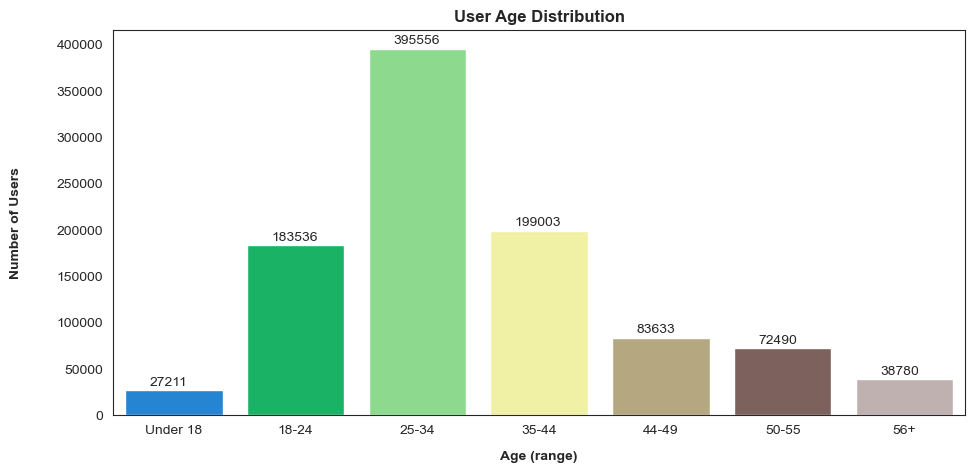

In [106]:
# Visual Representation of the Age Distribution :

plt.figure(figsize=(11,5))
txt = {'weight':'bold'}
sns.set_style('white')
sns.countplot(x='Age',data=Master_data,palette='terrain')
plt.title('User Age Distribution',fontdict=txt)
plt.xlabel('Age (range)',fontdict=txt,labelpad=10)
plt.ylabel('Number of Users',fontdict=txt,labelpad=25)
plt.xticks([0,1,2,3,4,5,6],['Under 18','18-24','25-34','35-44','44-49','50-55','56+'],)

for i in range(7):
    plt.annotate(age_dist['Age'].iloc[i],xy=(i-0.2,age_dist['Age'].iloc[i]+5000,),size=10)

plt.show()


### Conclusion : Most of the users are between age 25 to 34

# 

## 2) User Rating for movie Toy Story

In [33]:
# Finding User rating for the movie Toy Story

Toy_stort_df = Master_data[Master_data['Title'] == "Toy Story (1995)"]
TS_rating = Toy_stort_df['Rating'].value_counts().to_frame()
TS_rating


,Rating
4,835
5,820
3,345
2,61
1,16


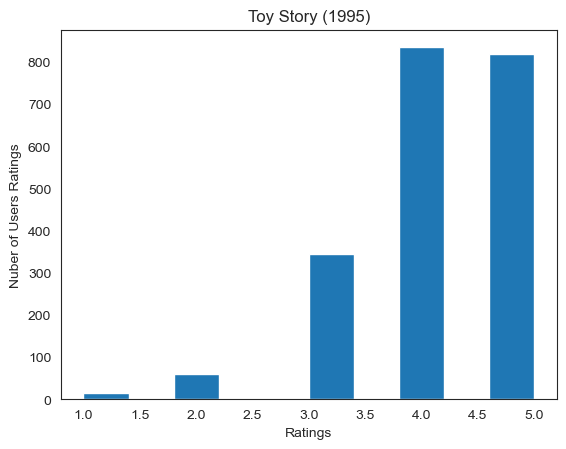

In [49]:
# Visual Representation showing the percentage of each rating for the movie Toy Story

plt.hist(x=Toy_stort_df['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Nuber of Users Ratings')
plt.title('Toy Story (1995)')

plt.show()


In [63]:
# Finding the average overall rating

print('Average Rating for the movie Toy Story is {:.2f}'.format(Toy_stort_df['Rating'].mean()))


Average Rating for the movie Toy Story is 4.15


### Conclusion : The movie Toy Story was rated 4 to 5 and its average rating is 4.15.

# 

In [64]:
# Viewership by Age

viewership = pd.merge(ratings,users,how='left',left_on=['UserID'],right_on=['UserID'])


In [65]:

viewership.shape


(1000209, 8)

In [66]:

ratings.shape


(1000209, 4)

In [67]:

viewership.head()


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [68]:
#Select on 'Toy Story' data

viewership_of_Toy_stort_df=viewership[viewership['MovieID']==1]
viewership_of_Toy_stort_df.shape


(2077, 8)

In [69]:

viewership_of_Toy_stort_df.head()


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
40,1,1,5,978824268,F,1,10,48067
469,6,1,4,978237008,F,50,9,55117
581,8,1,4,978233496,M,25,12,11413
711,9,1,5,978225952,M,25,17,61614
837,10,1,5,978226474,F,35,1,95370


In [70]:

viewership_of_Toy_stort_df.groupby('Age').size()


Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

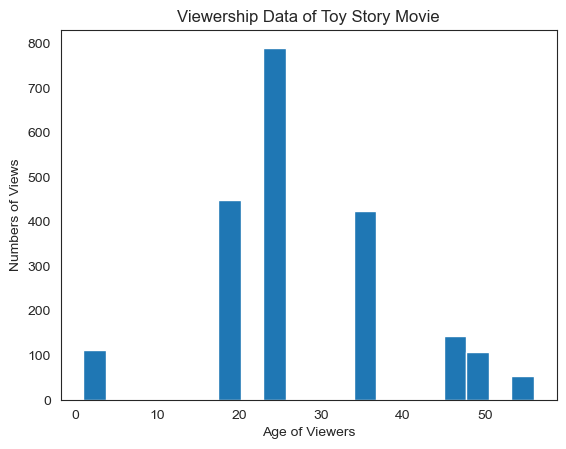

In [71]:
# plot the graph of viewership movie Toy Story

plt.hist(x=[viewership_of_Toy_stort_df.Age], data=viewership_of_Toy_stort_df,bins=20)
plt.xlabel('Age of Viewers')
plt.ylabel('Numbers of Views')
plt.title('Viewership Data of Toy Story Movie')

plt.show()


### Mejority Toy Story viewers are in the age range of 18 to 35, Maximum users are 25 years of age.

# 

## 3) Top 25 Movies by Viewership Rating. 

In [72]:
# Finding top 25 movies based the average viewership ratings

Top25_movies = pd.DataFrame(Master_data.groupby('Title')['Rating'].agg('mean')).sort_values(by='Rating',ascending=False).head(25)
Top25_movies['Title'] = Top25_movies.index

Top25_movies.index = range(1,26)
Top25_movies[['Title','Rating']]


,Title,Rating
1,Ulysses (Ulisse) (1954),5.000000
2,Lured (1947),5.000000
3,Follow the Bitch (1998),5.000000
4,Bittersweet Motel (2000),5.000000
5,Song of Freedom (1936),5.000000
6,One Little Indian (1973),5.000000
7,Smashing Time (1967),5.000000
8,Schlafes Bruder (Brother of Sleep) (1995),5.000000
9,"Gate of Heavenly Peace, The (1995)",5.000000
10,"Baby, The (1973)",5.000000


### Conclusion : Top 25 Movies has been rated 5.

# 

## 4) UserID = 2696 Rated Movies.

In [73]:
# Extracting the details of User ID 2696

Userid_2696 = Master_data[Master_data['UserID']==2696]
Userid_2696 = Userid_2696.sort_values('Rating',ascending=False,ignore_index=True)
Userid_2696[['MovieID','Title','Rating']]


,MovieID,Title,Rating
0,800,Lone Star (1996),5
1,1645,"Devil's Advocate, The (1997)",4
2,1783,Palmetto (1998),4
3,1092,Basic Instinct (1992),4
4,3176,"Talented Mr. Ripley, The (1999)",4
5,1258,"Shining, The (1980)",4
6,2389,Psycho (1998),4
7,1892,"Perfect Murder, A (1998)",4
8,1617,L.A. Confidential (1997),4
9,1625,"Game, The (1997)",4


### Comments : This has rated 5 to the movie titled "Lone Star (1996)" and Most of this rating are 4.

# 

# Feature Engineering Task 1
    - Using column 'Genres', Find out all the Unique genres.

In [74]:
# Storing Genres column to a variable name genre

genre = df_final['Genres']
genre.head()


0             Animation|Children's|Comedy
1    Animation|Children's|Musical|Romance
2                                   Drama
3         Action|Adventure|Fantasy|Sci-Fi
4                               Drama|War
Name: Genres, dtype: object

In [75]:
# For loop to store the splitted genre data and append to a list

list1=[]
for row in genre:
    row_list = row.split('|')
    for i in range(len(row_list)):
        list1.append(row_list[i])
        

In [21]:
# Finding unique genre and nnumber of unique geners

unique_genre = list(set(list1))
print(unique_genre)
print()
print('Total Unique Genres :',len(unique_genre))


['Mystery', 'Animation', 'War', 'Documentary', 'Action', 'Drama', 'Western', 'Horror', 'Romance', 'Sci-Fi', 'Thriller', 'Comedy', 'Musical', 'Adventure', 'Film-Noir', 'Crime', "Children's", 'Fantasy']

Total Unique Genres : 18


# 

# Feature Engineering Task 2
    - Create a separete column for each genre category with a one-hot encoding (1 and 0) whether or not the movie belong to that genre.

In [76]:
# Creating a new variable onehotcode to perform onehotcoding

onehotcode = df_final.copy()
onehotcode.head(3)


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067


In [77]:
# Converting categorical variable to numerical varibale 

dummy = onehotcode['Genres'].str.get_dummies()
dummy.head(3)


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [78]:
# Merging the final dataset with newly ceated onehotcode based on index

final_dataset = pd.merge(onehotcode,dummy,how='inner',left_index=True,right_index=True)
print('Final dataset shape:',final_dataset.shape)
final_dataset.head(3)


Final dataset shape: (1000209, 28)


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# 

# Feature Engineering Task 3

    - Determine the features affecting the rating of any particular movie.

In [79]:
# Converting categorical column 'Gender' into numerical column.

gender_dummuy = final_dataset['Gender'].str.get_dummies()


In [80]:
# Merging the new numerical column to find dataset based on index

final_dataset = pd.merge(final_dataset,gender_dummuy,how='inner',left_index=True,right_index=True)
final_dataset.head(3)


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


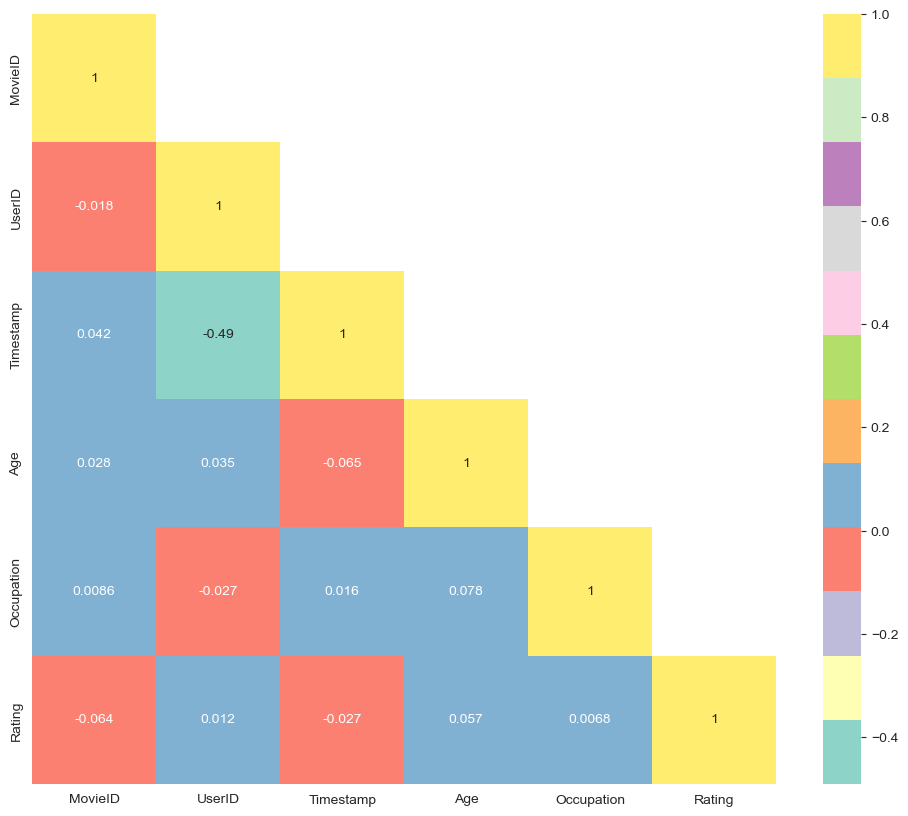

In [81]:
# Creating Heatmap

m = np.ones_like(final_dataset[['MovieID','UserID','Timestamp','Age','Occupation','Rating']].corr())
m[np.tril_indices_from(m)]=0
sns.set_style('white')

plt.figure(figsize=(12,10))
sns.heatmap(final_dataset[['MovieID','UserID','Timestamp','Age','Occupation','Rating']].corr(),annot=True,cmap='Set3',mask=m)

plt.show()


In [82]:
# Creating a new dataframe with only continuos data and dummies

features = final_dataset[['MovieID','UserID','Timestamp','Age','Occupation',
                             'Action','Adventure','Animation',"Children's",'Comedy',
                                'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                                   'Mystery','Romance','Sci-Fi','Thriller','War','Western','Rating']]


In [83]:
# Stroring feature and target variable

x = features.drop(['Rating'],axis=1)
y = features['Rating']


In [85]:
# Feature selection using SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [86]:
# Selecting best 10 features

bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# Concat two dataframes for better visualisation

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] # naming the dataframe column

print(featureScores.nlargest(10,'Score'))


     Features         Score
2   Timestamp  1.638876e+08
0     MovieID  3.341344e+06
1      UserID  1.720993e+05
3         Age  1.865494e+04
12      Drama  9.705111e+03
15     Horror  9.192491e+03
20        War  6.405101e+03
14  Film-Noir  3.826022e+03
18     Sci-Fi  1.845628e+03
5      Action  1.734519e+03


In [88]:
# Features selected are stored in a dataframe 

feature_selection_df = features[['Timestamp','MovieID','UserID','Age','Drama',
                                    'Horror','War','Film-Noir','Sci-Fi','Action']]

feature_selection_df


,Timestamp,MovieID,UserID,Age,Drama,Horror,War,Film-Noir,Sci-Fi,Action
0,978824268,1,1,1,0,0,0,0,0,0
1,978824351,48,1,1,0,0,0,0,0,0
2,978301777,150,1,1,1,0,0,0,0,0
3,978300760,260,1,1,0,0,0,0,1,1
4,978824195,527,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1000204,958489970,3513,5727,25,1,0,0,0,0,0
1000205,958489970,3535,5727,25,0,1,0,0,0,0
1000206,958489902,3536,5727,25,0,0,0,0,0,0
1000207,958490699,3555,5727,25,0,0,0,0,0,1


# 

# Feature Engineering Task 4
    -Develop an appropriate model to predict the movie ratings

In [89]:
# Splitting dataset for training and testing

x_train,x_test,y_train,y_test = train_test_split(feature_selection_df,y,test_size=0.20,random_state=1)


In [90]:
# size of train and test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape


((800167, 10), (200042, 10), (800167,), (200042,))

# 

## Model 1 - Decision Tree

In [91]:
# Object Creation 

clf = DecisionTreeClassifier()

# Model Fitting 

clf = clf.fit(x_train,y_train)

# Prediction of test data 

y_pred = clf.predict(x_test)

print("Decision Tree Accuracy:{:2f}".format(metrics.accuracy_score(y_test,y_pred)))


Decision Tree Accuracy:0.316524


In [92]:
a = pd.DataFrame()
a['y_test'] = y_test
a['y_pred'] = y_pred
a.head(20)


,y_test,y_pred
630120,4,3
229398,5,5
758377,3,4
159240,5,4
254252,4,3
27168,3,3
196538,3,4
37123,3,2
982048,4,5
994502,2,3


# 

## Model 2 - K-Nearest Neighbours

In [93]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
knnaccuracy = knn.score(x_test, y_test)
knn_predictions = knn.predict(x_test) 
print("KNN test accuracy: {:.4f}".format(knnaccuracy))
print("KNN train accuracy: {:.4f}".format(knn.score(x_train,y_train)))

KNN test accuracy: 0.3568
KNN train accuracy: 0.5238


# 

## Model 3 -  Gaussian Naive Bayes

In [94]:
gnb = GaussianNB().fit(x_train, y_train)
gnbaccuracy = gnb.score(x_test, y_test)
gnb_predictions = gnb.predict(x_test)
print("GNB test accuracy: {:.4f}".format(gnbaccuracy))
print("GNB train accuracy: {:.4f}".format(gnb.score(x_train,y_train)))

GNB test accuracy: 0.3485
GNB train accuracy: 0.3470


### Comparing the accuracy score of all three models , K-Nearest Neighbours has higher accuracy than other models


                                                                                        **Project Done by**
                                                                                     ** ANANT DATTATRAY KALEKAR**

#                                                THANK YOU...                                  